# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [5]:
#filtrando os dados qualitativos da base
df_filtrados = df[['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']]

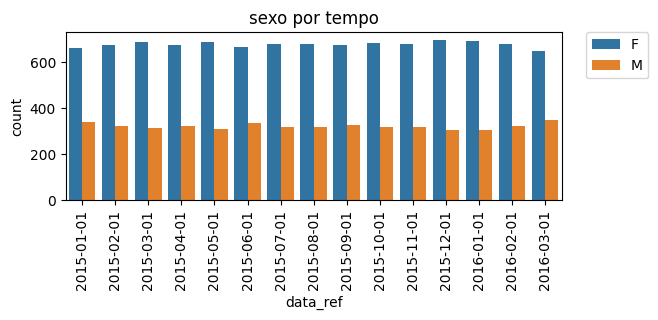

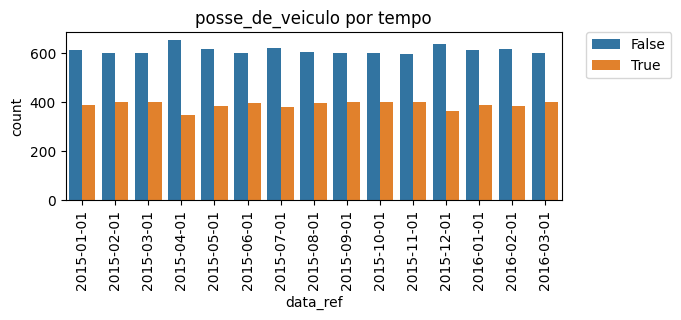

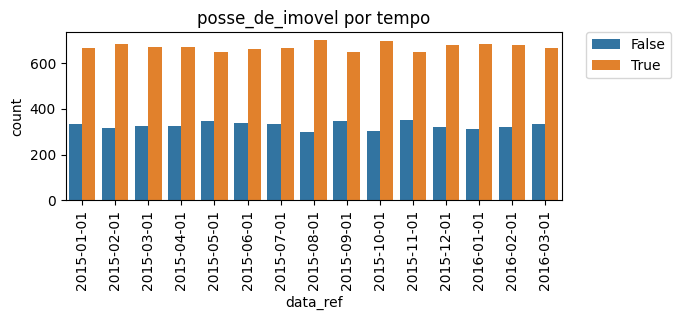

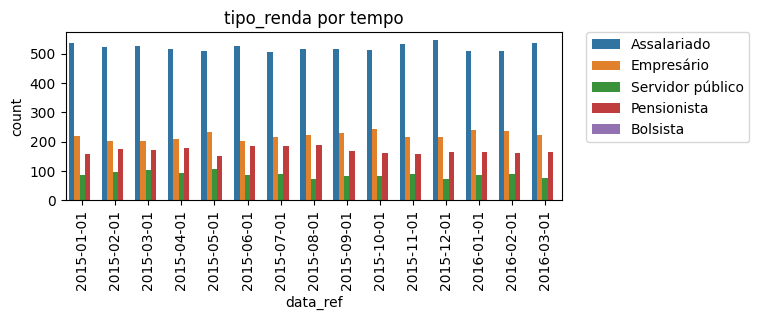

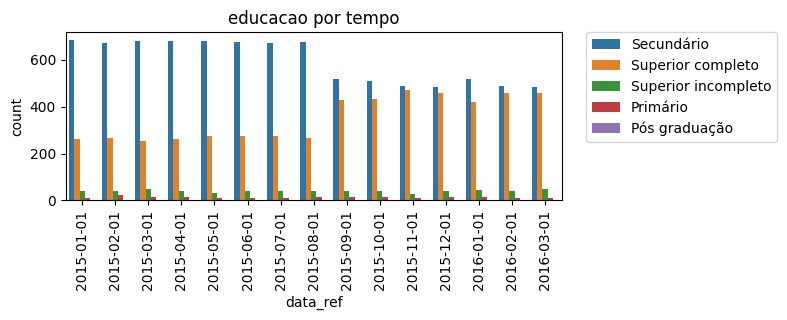

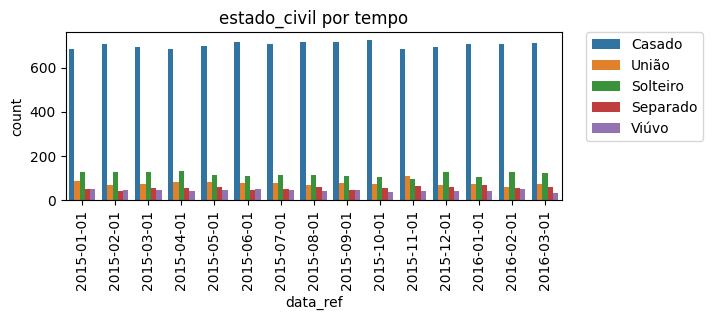

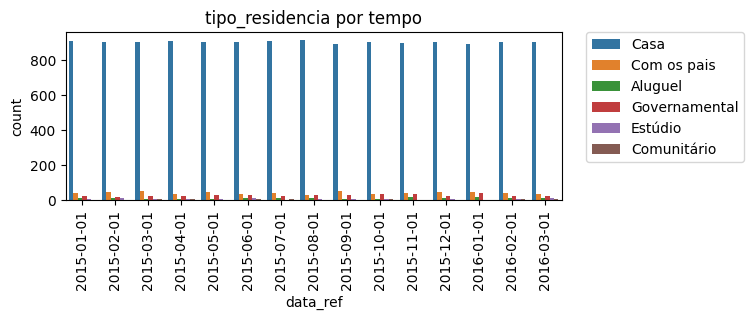

In [6]:
#plotando os gráficos de contagem para todas as variaveis
conta = 1
for var in df_filtrados.columns[1:]:
    plt.subplot(2,1,conta)
    conta=+1
    sns.countplot(x='data_ref', hue=var, data=df)
    plt.title(f'{var} por tempo')
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

na analise destes gráficos apenas percebemos uma mudançã rigida nos dados de educação por tempo, aonde do meu 08 para o 09 há uma grande diferença

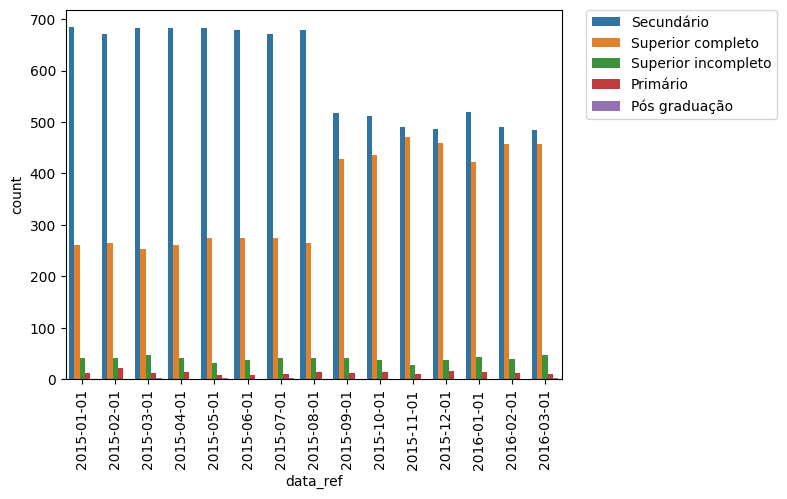

In [13]:
# analisando o gráfico escolaridade pelo tempo mais de perto
ax = sns.countplot(data=df, x='data_ref', hue='educacao')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [20]:
#DataFrame apenas com variáveis qualitativas
df_qualitativa = df.select_dtypes(include='object')

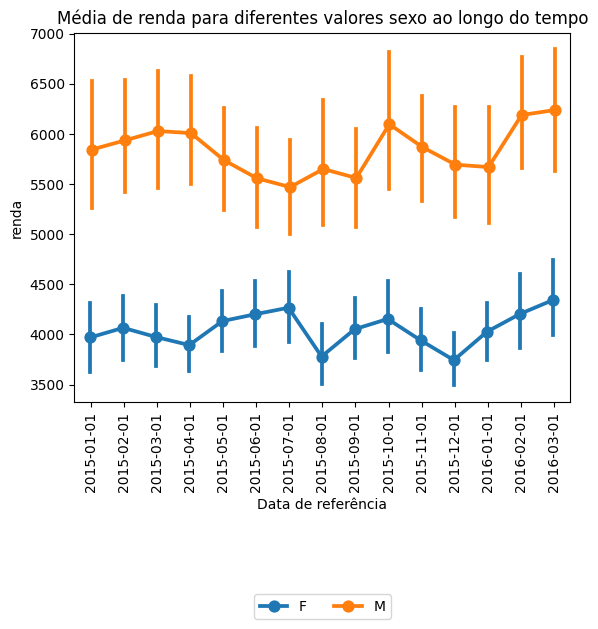

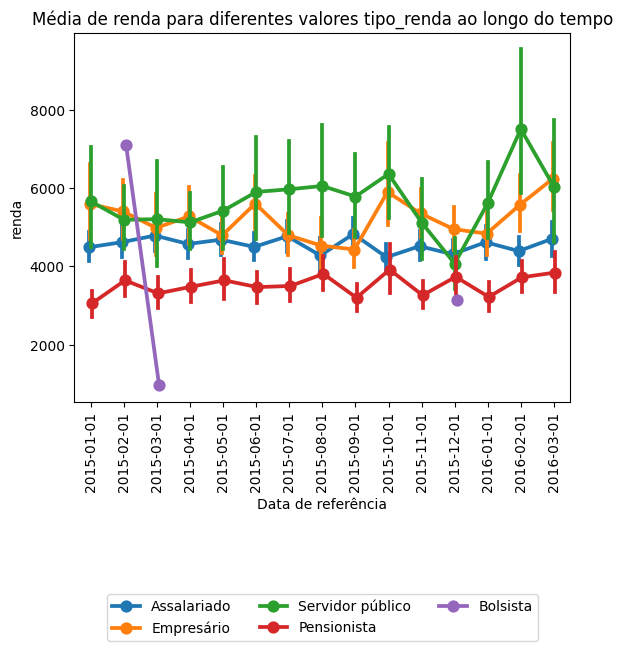

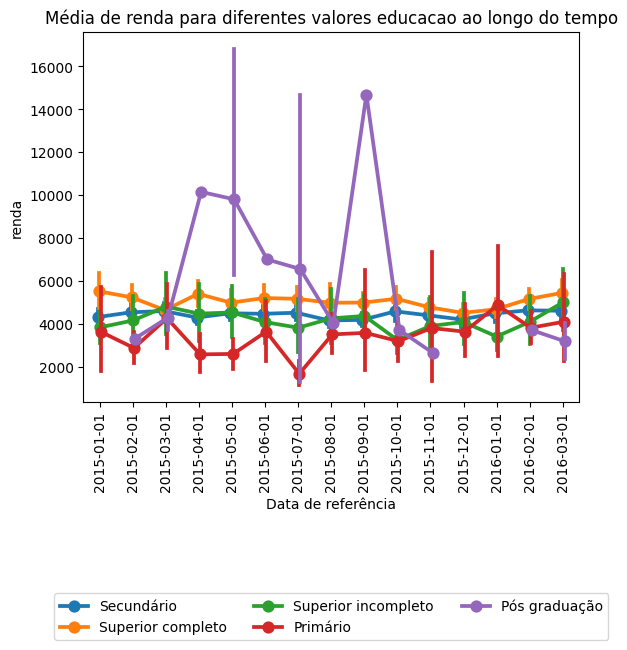

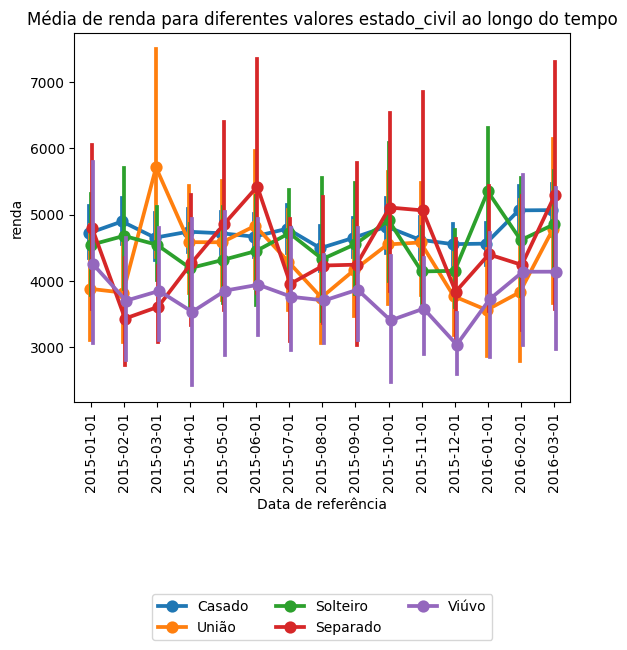

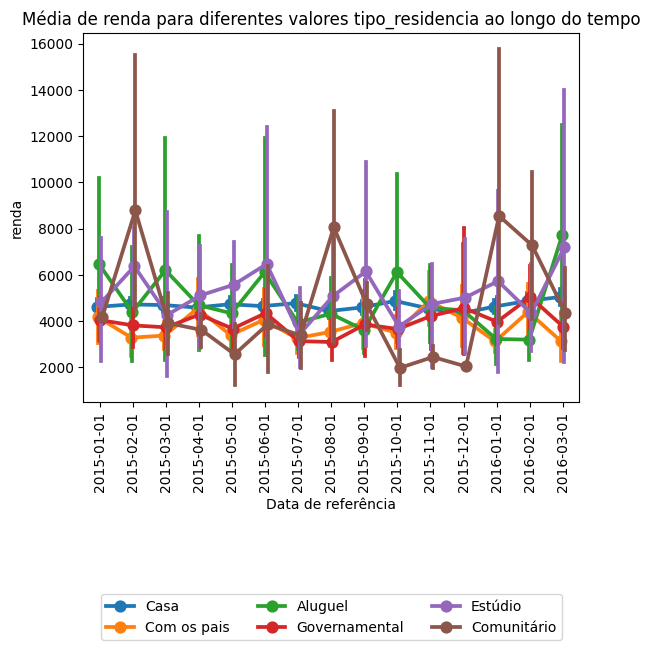

In [21]:
#plotando os gráficos de contagem para todas as variáveis qualitativas
conta = 1
for var in df_qualitativa.columns[1:]:
  plt.subplot(1,1,conta)
  conta=+1
  sns.pointplot(data=df, x='data_ref', y='renda', hue=var, dodge=True, errorbar=('ci', 95))
  plt.title(f'Média de renda para diferentes valores {var} ao longo do tempo')
  plt.xticks(rotation=90)
  plt.xlabel('Data de referência')
  plt.legend(loc = 'upper center', bbox_to_anchor=(0.5, -.50),ncol = 3)
  plt.show()

percebesse um crescimento abrupto na renda de pós graduados entre o mês 08 e 09.

Já os viúvos assumiram por quase todo o gráfico como o estado civil que menos possuem média de renda durante os meses, tálvez pela maioria serêm pensionistas? vamos descobrir

In [32]:
#cruzando a tábela aposentados com pensionistas
tabela_cruzada = pd.crosstab(df['estado_civil'], df['tipo_renda'])
tab_cruzada_porc = round(tabela_cruzada.div(tabela_cruzada.sum(axis = 1), axis = 0), 2)
tab_cruzada_porc

tipo_renda,Assalariado,Bolsista,Empresário,Pensionista,Servidor público
estado_civil,,,,,
Casado,0.54,0.0,0.21,0.16,0.09
Separado,0.54,0.0,0.24,0.16,0.07
Solteiro,0.52,0.0,0.26,0.14,0.08
União,0.51,0.0,0.28,0.12,0.09
Viúvo,0.33,0.0,0.08,0.53,0.06


tendo que 53% dos viúvos já sao pensionistas, um pouco mais da metade, um pode ser um ótimo indicador de porque sempre se manterem um pouco abaixo no gráfico de estado civil com média de renda